In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data 

In [4]:
fingerprints = pd.read_csv("data/crispr_gene_fingerprint_cgp.txt", sep="\t", index_col=0).T
assert(not fingerprints.isna().values.any())
fingerprints

GeneSet,NAKAMURA_CANCER_MICROENVIRONMENT_UP,NAKAMURA_CANCER_MICROENVIRONMENT_DN,WEST_ADRENOCORTICAL_TUMOR_MARKERS_UP,WEST_ADRENOCORTICAL_TUMOR_MARKERS_DN,WINTER_HYPOXIA_UP,WINTER_HYPOXIA_DN,PARENT_MTOR_SIGNALING_UP,PARENT_MTOR_SIGNALING_DN,PYEON_HPV_POSITIVE_TUMORS_UP,PYEON_HPV_POSITIVE_TUMORS_DN,...,KIM_LIVER_CANCER_POOR_SURVIVAL_UP,KIM_LIVER_CANCER_POOR_SURVIVAL_DN,HOLLERN_EMT_BREAST_TUMOR_UP,HOLLERN_EMT_BREAST_TUMOR_DN,HOLLERN_SQUAMOUS_BREAST_TUMOR,HOLLERN_SOLID_NODULAR_BREAST_TUMOR_UP,HOLLERN_SOLID_NODULAR_BREAST_TUMOR_DN,FLORIO_NEOCORTEX_BASAL_RADIAL_GLIA_DN,FLORIO_NEOCORTEX_BASAL_RADIAL_GLIA_UP,FLORIO_HUMAN_NEOCORTEX
AARS2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AASDHPPT,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCE1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABCG1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABHD11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNF407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNF521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNHIT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mut = pd.read_csv("data/ccl_mut_data_paired_with_tcga.txt", sep='\t', index_col=0).T
mut = mut.fillna(0)
assert(not mut.isna().values.any())
mut

Gene,A1CF,A2M,A2ML1,AARS2,AASDH,AASS,ABCA1,ABCA10,ABCA12,ABCA13,...,ZSCAN18,ZSCAN20,ZSCAN4,ZSCAN5B,ZSWIM2,ZSWIM4,ZSWIM5,ZSWIM8,ZZEF1,ZZZ3
42MGBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
639V,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
647V,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
WM2664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YAPC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
YH13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
exp = pd.read_csv("data/ccl_exp_data_paired_with_tcga.txt", sep='\t', index_col=0).T
exp = exp.fillna(0)
exp

Gene,A1BG,A2M,A2ML1,A4GALT,AADAT,AASS,AATK,ABAT,ABCA1,ABCA2,...,ZNF853,ZNF880,ZNF883,ZNF90,ZNF91,ZNF93,ZP3,ZSCAN18,ZSCAN31,ZWINT
42MGBA,5.1140,0.0000,0.0132,0.9142,2.6417,2.3509,0.0000,3.1086,0.8356,2.5962,...,0.8103,2.1151,2.9107,2.7402,3.2378,4.4178,1.7191,4.7736,4.7731,6.5486
5637,0.0000,0.0000,2.1871,4.3469,4.4463,1.5008,0.0370,0.3832,3.1634,2.7309,...,2.7622,3.9319,1.6678,2.7811,2.1709,3.1682,2.9261,2.6390,2.4144,6.5905
639V,4.4350,0.0000,0.0000,0.7587,3.1762,4.3613,0.1072,2.2158,0.5657,5.1543,...,2.2346,1.5695,2.0670,3.5398,3.2425,3.8676,0.0000,3.4622,3.5366,7.1167
647V,0.9679,0.0392,0.0000,1.9869,1.8197,3.0361,0.1510,3.2875,0.1498,3.5741,...,3.5356,3.4525,2.6489,1.2004,2.0728,2.8888,0.2877,0.0488,2.6682,6.4768
697,4.9786,0.1531,0.0779,0.0000,0.0000,1.1991,0.0133,1.5937,1.5047,4.3382,...,0.0262,4.9914,0.0000,4.3955,3.5300,4.4030,0.1049,5.1622,1.2826,7.2414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM115,4.7513,7.0051,0.0000,0.0000,3.2557,4.4916,0.7165,3.9798,0.3158,4.4030,...,2.6881,3.8405,3.2015,1.6505,1.7685,1.7110,2.0601,2.3032,1.8160,6.0410
WM2664,5.0723,3.9229,0.0000,0.0522,3.5446,4.5352,2.8518,1.0760,2.9334,4.4117,...,2.1364,2.3518,3.3836,0.8780,3.3786,2.1984,0.5850,0.4832,0.4886,7.0823
YAPC,0.0000,0.0000,0.0390,3.8677,3.0276,2.8485,0.3186,0.0000,4.2535,4.2131,...,2.0725,0.0308,0.5425,0.1493,2.7279,1.4245,2.1699,4.4652,2.8531,7.5255
YH13,4.1577,2.0652,0.0000,1.1095,3.5694,4.8215,0.6105,0.6153,3.1950,4.1070,...,2.8853,4.9290,3.4334,0.6583,2.7844,1.8482,1.7396,5.6200,3.1430,5.5067


In [7]:
meth = pd.read_csv("data/ccl_meth_data_paired_with_tcga.txt", sep='\t', index_col=0).T
meth = meth.fillna(0)
meth

Probe,cg00000292,cg00005847,cg00008493,cg00013618,cg00015770,cg00016968,cg00019495,cg00022866,cg00025991,cg00027083,...,cg27635271,cg27637521,cg27641018,cg27643859,cg27644292,cg27648946,cg27650175,cg27651218,cg27652350,cg27661264
42MGBA,0.7440,0.9121,0.9207,0.4778,0.8316,0.8040,0.4077,0.7049,0.3705,0.1366,...,0.5419,0.1475,0.9581,0.9042,0.5177,0.8702,0.0532,0.6534,0.8270,0.4139
5637,0.8336,0.9406,0.8887,0.3852,0.6830,0.1605,0.0752,0.8248,0.6633,0.3895,...,0.6209,0.0911,0.2345,0.9273,0.3396,0.1152,0.0796,0.8970,0.1015,0.5603
639V,0.8840,0.9474,0.9051,0.8735,0.3888,0.3575,0.1470,0.7545,0.7566,0.9946,...,0.2283,0.1644,0.7921,0.9399,0.6732,0.8315,0.0727,0.8699,0.0951,0.3594
647V,0.9093,0.9366,0.9171,0.7914,0.5392,0.1663,0.0705,0.8125,0.7239,0.5026,...,0.4542,0.1194,0.1553,0.9406,0.1705,0.1082,0.0851,0.7634,0.1625,0.2660
697,0.9199,0.9324,0.9133,0.9269,0.9188,0.9100,0.9198,0.4941,0.8343,0.9864,...,0.8395,0.8584,0.8946,0.9439,0.6157,0.9178,0.0422,0.8650,0.5967,0.8448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM115,0.8274,0.9333,0.9009,0.7626,0.0934,0.8544,0.5600,0.8237,0.8302,0.0157,...,0.8563,0.8754,0.7407,0.9277,0.1341,0.1962,0.0693,0.7320,0.8851,0.4373
WM2664,0.8583,0.9666,0.9098,0.1877,0.1675,0.4943,0.1275,0.7625,0.7330,0.0069,...,0.8354,0.8687,0.0923,0.9304,0.3354,0.1561,0.2267,0.5950,0.1080,0.1780
YAPC,0.8516,0.9268,0.8992,0.8165,0.0797,0.1374,0.0396,0.8840,0.8711,0.8578,...,0.8761,0.1354,0.9254,0.9307,0.6484,0.1255,0.0870,0.9016,0.9061,0.2589
YH13,0.6058,0.9250,0.8913,0.2328,0.7266,0.5701,0.0841,0.8456,0.6253,0.9854,...,0.4561,0.5396,0.6908,0.9430,0.1154,0.0776,0.0482,0.9073,0.3612,0.3617


In [8]:
cna = pd.read_csv("data/ccl_cna_data_paired_with_tcga.txt", sep='\t', index_col=0).T
cna = cna.fillna(0)
cna

CNA,128843_chr7_5473to5474_10k,128844_chr7_5474to5475_10k,128845_chr7_5475to5476_10k,128846_chr7_5476to5477_10k,128847_chr7_5477to5478_10k,128848_chr7_5478to5479_10k,128849_chr7_5479to5480_10k,128850_chr7_5480to5481_10k,128851_chr7_5481to5482_10k,128852_chr7_5482to5483_10k,...,188541_chr11_6944to6945_10k,188542_chr11_6945to6946_10k,188543_chr11_6946to6947_10k,188544_chr11_6947to6948_10k,188545_chr11_6948to6949_10k,188546_chr11_6949to6950_10k,188547_chr11_6950to6951_10k,188548_chr11_6951to6952_10k,188549_chr11_6952to6953_10k,188551_chr11_6954to6955_10k
42MGBA,0.2642,0.2642,0.2642,0.2642,0.2642,0.2642,0.2642,0.2642,0.2642,0.2642,...,-0.2881,-0.2881,-0.2881,-0.2881,-0.2881,-0.2881,-0.2881,-0.2881,-0.2881,-0.2881
5637,0.3670,0.3670,0.3670,0.3670,0.3670,0.3670,0.3670,0.3670,0.3670,0.3670,...,0.3607,0.3607,0.3607,0.3607,0.3607,0.3607,0.3607,0.3607,0.3607,0.3607
639V,0.2276,0.2276,0.2276,0.2276,0.2276,0.2276,0.2276,0.2276,0.2276,0.2276,...,0.2480,0.2480,0.2480,0.2480,0.2480,0.2480,0.2480,0.2480,0.2480,0.2480
647V,1.1383,1.1383,1.1383,1.1383,1.1383,1.1383,1.1383,1.1383,1.1383,1.1383,...,0.2867,0.2867,0.2867,0.2867,0.2867,0.2867,0.2867,0.2867,0.2867,0.2867
697,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,...,0.0257,0.0257,0.0257,0.0257,0.0257,0.0257,0.0257,0.0257,0.0257,0.0257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM115,1.0173,1.0173,1.0173,1.0173,1.0173,1.0173,1.0173,1.0173,1.0173,1.0173,...,0.0355,0.0355,0.0355,0.0355,0.0355,0.0355,0.0355,0.0355,0.0355,0.0355
WM2664,0.6383,0.6383,0.6383,0.6383,0.6383,0.6383,0.6383,0.6383,0.6383,0.6383,...,0.0413,0.0413,0.0413,0.0413,0.0413,0.0413,0.0413,0.0413,0.0413,0.0413
YAPC,0.3915,0.3915,0.3915,0.3915,0.3915,0.3915,0.3915,0.3915,0.3915,0.3915,...,0.7835,0.7835,0.7835,0.7835,0.7835,0.7835,0.7835,0.7835,0.7835,0.7835
YH13,0.8337,0.8337,0.8337,0.8337,0.8337,0.8337,0.8337,0.8337,0.8337,0.8337,...,0.1384,0.1384,0.1384,0.1384,0.1384,0.1384,0.1384,0.1384,0.1384,0.1384


In [78]:
# from depmap portal 2018Q2
dep_scores = pd.read_csv("data/gene_effect.csv", index_col=0)
dep_scores = dep_scores.fillna(0)
dep_scores.columns = [d.split()[0] for d in dep_scores.columns]
dep_scores = dep_scores[fingerprints.index]
dep_scores.index = [d.split("_")[0] for d in dep_scores.index]
dep_scores = dep_scores.loc[exp.index]
dep_scores

,AARS2,AASDHPPT,ABCE1,ABCG1,ABHD11,ABI1,ABL1,ABL2,ACACA,ACLY,...,ZFYVE20,ZMYND8,ZNF131,ZNF217,ZNF331,ZNF384,ZNF407,ZNF521,ZNHIT2,ZRANB2
42MGBA,-0.697250,-0.533568,-1.015982,-0.209078,-0.450482,-0.022071,-0.214546,-0.011900,-0.171886,-0.103516,...,-0.352625,-0.261010,-0.447765,-0.381792,0.321585,-0.280447,-0.415469,-0.079054,-1.098890,-0.412052
5637,-0.735721,-0.804283,-0.995267,-0.213987,-0.507170,0.098081,-0.034282,0.229993,-0.332765,-0.334068,...,-0.473847,-0.492669,-0.767877,-0.381021,0.216244,-0.005040,-0.516185,-0.034308,-1.101886,-0.442147
639V,-0.906303,-0.699498,-1.070244,-0.295696,-0.283822,-0.019839,-0.000951,0.000687,-0.300372,0.097802,...,-0.175230,-0.160641,-0.696735,-0.288317,0.111741,-0.072596,-0.250057,-0.058165,-0.592418,-0.290930
647V,-0.438357,-0.661774,-0.904167,-0.393751,-0.323649,-0.048251,-0.147742,0.123147,-0.287305,-0.279186,...,-0.118601,-0.305294,-0.741818,-0.316790,0.191467,-0.241999,-0.508625,-0.134836,-1.042999,-0.167502
697,-0.863519,-0.553447,-1.055107,-0.134377,-0.765060,-0.064791,-0.135394,0.171706,-0.579099,-0.686526,...,-0.537860,-1.039256,-0.796801,-0.639347,0.230900,-0.399680,-0.702327,-0.090415,-1.093998,-0.767747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM115,-0.359466,-0.571191,-0.734490,-0.794193,-0.745013,0.172465,-0.260208,0.108978,-0.238695,-0.131665,...,-0.326013,-1.103199,-0.611511,-0.438392,0.436092,0.007153,-0.507682,-0.082025,-1.449824,-0.432454
WM2664,-0.608590,-0.575295,-0.766267,-0.419968,-0.517071,-0.148943,-0.159666,0.209497,-0.489257,-0.724650,...,-0.258008,-0.916086,-0.674506,-0.194658,0.162652,-0.424156,-0.280405,-0.114173,-1.038206,-0.294382
YAPC,-0.294279,-0.395299,-1.017642,-0.417548,-0.255604,-0.185223,-0.210388,0.060990,-0.158871,-0.438073,...,-0.135327,-0.779388,-0.804164,-0.354574,0.113241,-0.247237,-0.326068,-0.021583,-0.882490,-0.535719
YH13,-0.754095,-0.687682,-0.936506,-0.332924,-0.325736,-0.447149,0.012192,0.315229,-0.445303,-0.262315,...,-0.171438,-0.284188,-1.001441,-0.005915,0.244907,0.089498,-0.272195,0.073043,-1.053443,-0.342983


In [32]:
# from Chiu et al supplementary
deepdep_cv_results = pd.read_excel("data/sciadv.abh1275_Table_S8.xlsx", skiprows=2, index_col=0, skipfooter=2).T
deepdep_cv_results.index = [ind.split("_")[0] for ind in deepdep_cv_results.index]
deepdep_cv_results = deepdep_cv_results.loc[dep_scores.index][dep_scores.columns]
deepdep_cv_results

Gene dependency,AARS2,AASDHPPT,ABCE1,ABCG1,ABHD11,ABI1,ABL1,ABL2,ACACA,ACLY,...,ZFYVE20,ZMYND8,ZNF131,ZNF217,ZNF331,ZNF384,ZNF407,ZNF521,ZNHIT2,ZRANB2
42MGBA,-0.4110,-0.3299,-0.8682,-0.4622,-0.4751,0.0110,-0.0210,0.1876,-0.3960,-0.2139,...,-0.2438,-0.4190,-0.7419,-0.2040,0.2664,-0.0915,-0.5143,-0.0103,-1.1587,-0.2591
5637,-0.5464,-0.3626,-0.9218,-0.3479,-0.4672,-0.0601,-0.0645,0.1638,-0.3311,-0.2811,...,-0.2354,-0.3822,-0.6313,-0.4163,0.2616,-0.0944,-0.5213,-0.0400,-1.0899,-0.3463
639V,-0.6541,-0.5469,-0.6393,-0.4760,-0.6903,-0.0930,-0.0713,0.0974,-0.3576,-0.3091,...,-0.3650,-0.4218,-0.8860,-0.5665,0.2769,-0.2211,-0.6891,-0.1227,-1.3568,-0.4619
647V,-0.5755,-0.4795,-0.7884,-0.4645,-0.5338,-0.0686,-0.1349,0.0670,-0.2860,-0.3564,...,-0.4192,-0.5050,-0.7120,-0.4295,0.1755,-0.1919,-0.6240,-0.1453,-1.0642,-0.3742
697,-0.5713,-0.2283,-0.6867,-0.0612,-0.5107,0.0088,-0.0033,0.1755,0.0110,-0.4980,...,-0.4355,-0.6667,-0.5271,-0.4770,0.2819,0.0421,-0.3930,-0.0401,-0.9184,-0.1655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM115,-0.5000,-0.3754,-0.8686,-0.4387,-0.4677,0.0224,-0.0838,0.1710,-0.3285,-0.3943,...,-0.2661,-0.4225,-0.6950,-0.4072,0.2750,-0.1279,-0.5446,-0.0129,-1.1219,-0.3931
WM2664,-0.4751,-0.3795,-0.7161,-0.4917,-0.4707,-0.0061,-0.0503,0.1580,-0.2954,-0.3517,...,-0.3154,-0.4591,-0.6389,-0.3339,0.2312,-0.0859,-0.5049,0.0079,-1.2062,-0.1895
YAPC,-0.4442,-0.3378,-1.0036,-0.3121,-0.4451,-0.0871,-0.0516,0.1935,-0.4035,-0.4366,...,-0.2380,-0.4337,-0.7031,-0.3324,0.3398,-0.1178,-0.6182,-0.0962,-1.0771,-0.3967
YH13,-0.5531,-0.4461,-0.7753,-0.4869,-0.3442,-0.0052,0.0095,0.1492,-0.3346,-0.1832,...,-0.2360,-0.3802,-0.7021,-0.3140,0.2103,-0.0927,-0.5321,-0.0865,-1.0205,-0.2889


# Perform cross-validation for ridge baseline

In [14]:
from sklearn.model_selection import KFold

In [15]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [17]:
from sklearn.linear_model import Ridge
from tqdm import tqdm

def get_prediction_df(data, labels):
    
    predictions = np.ones((labels.shape[0], labels.shape[1])) * -420

    for i, (train_index, test_index) in tqdm(enumerate(kfold.split(data))):
        X_train = data.iloc[train_index]
        y_train = labels.iloc[train_index]

        X_test = data.iloc[test_index]
        y_test = labels.iloc[test_index]

        model = Ridge()
        model.fit(X_train, y_train)
        y_pred_curr = model.predict(X_test)

        predictions[test_index, :] = y_pred_curr

    prediction_df = pd.DataFrame(predictions, index=labels.index, columns=labels.columns)
    return prediction_df

In [34]:
datasets = {
    "All" : pd.concat([exp, mut, cna, meth], axis=1),
    "Mut" : mut,
    "Exp" : exp,
    "Methyl" : meth,
    "CNA" : cna,
    "Mut/Exp" : pd.concat([exp, mut], axis=1)
}

In [35]:
# get 10-fold cross validation results

prediction_dfs = {d : get_prediction_df(datasets[d], dep_scores) for d in datasets}

10it [00:09,  1.04it/s]
10it [00:01,  7.02it/s]
10it [00:01,  5.68it/s]
10it [00:02,  4.78it/s]
10it [00:02,  3.89it/s]
10it [00:03,  2.90it/s]


# Get mean per gene correlations for each model

In [36]:
def get_mean_per_gene_correlation(df_true, df_score, method='pearson'):
    score_list = []
    for col in df_score.columns:
        y_pred = df_score[col]
        y_true = df_true[col]
        score_list.append(y_true.corr(y_pred, method=method))
    return np.mean(score_list)

In [37]:
# get mean pearson correlations across genes

mean_pearsons = {d : get_mean_per_gene_correlation(dep_scores, prediction_dfs[d]) for d in prediction_dfs}
mean_pearsons

{'All': 0.27640660214378443,
 'Mut': 0.06302690368766549,
 'Exp': 0.2784124754150192,
 'Methyl': 0.22970412957292002,
 'CNA': -0.005312525646935564,
 'Mut/Exp': 0.28047636343197674}

In [38]:
# get mean pearson for cv results of deepdep all features model
mean_pearsons["DeepDEP All"] = get_mean_per_gene_correlation(dep_scores, deepdep_cv_results)
mean_pearsons

{'All': 0.27640660214378443,
 'Mut': 0.06302690368766549,
 'Exp': 0.2784124754150192,
 'Methyl': 0.22970412957292002,
 'CNA': -0.005312525646935564,
 'Mut/Exp': 0.28047636343197674,
 'DeepDEP All': 0.13732667679904875}

In [53]:
# We have the 10-fold cv results for the DeepDEP "All" model, but not for the simplified models.
# This cell extracts data from the bar plot in Chiu et al Fig. S5. Performance of simplified DeepDEP models.

mean_pearsons["DeepDEP Mut"] = 0.0563
mean_pearsons["DeepDEP Exp"] = 0.146
mean_pearsons["DeepDEP Methyl"] = 0.154
mean_pearsons["DeepDEP CNA"] = 0.0141
mean_pearsons["DeepDEP Mut/Exp"] = 0.169
mean_pearsons

{'All': 0.27640660214378443,
 'Mut': 0.06302690368766549,
 'Exp': 0.2784124754150192,
 'Methyl': 0.22970412957292002,
 'CNA': -0.005312525646935564,
 'Mut/Exp': 0.28047636343197674,
 'DeepDEP All': 0.13732667679904875,
 'DeepDEP Mut': 0.0563,
 'DeepDEP Exp': 0.146,
 'DeepDEP Methyl': 0.154,
 'DeepDEP CNA': 0.0141,
 'DeepDEP Mut/Exp': 0.169}

# Plot comparisons

In [54]:
keys = reversed(mean_pearsons.keys())
sorted_keys = sorted(keys, key = lambda x : -mean_pearsons[x if "DeepDEP" not in x else x.split()[1]])
sorted_keys

['DeepDEP Mut/Exp',
 'Mut/Exp',
 'DeepDEP Exp',
 'Exp',
 'DeepDEP All',
 'All',
 'DeepDEP Methyl',
 'Methyl',
 'DeepDEP Mut',
 'Mut',
 'DeepDEP CNA',
 'CNA']

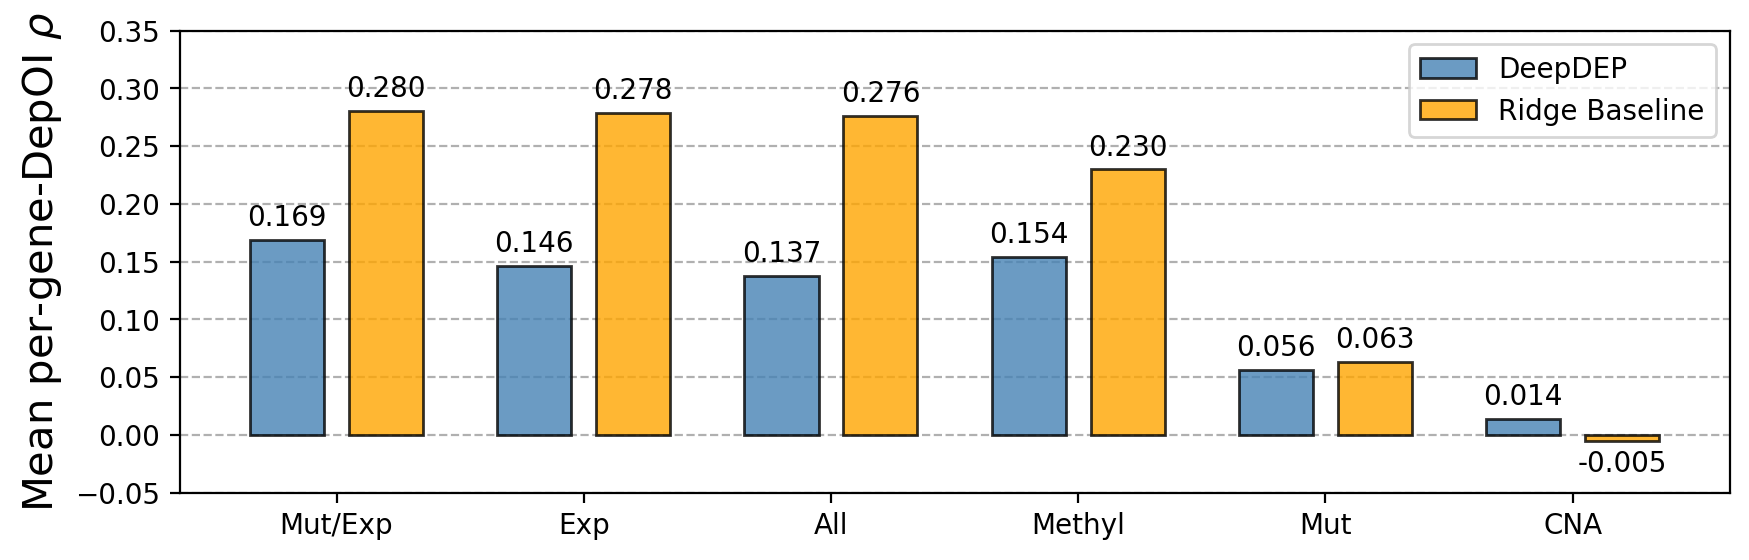

In [75]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 3), dpi=200)
plt.rcParams['svg.fonttype'] = 'none'

deepdep_color = "steelblue"
baseline_color = "orange"
alpha = 0.8
width = 0.6
spacing = 0.1

positions = [i + (spacing if i % 2 == 0 else -spacing) for i in range(len(sorted_keys))]
colors = [deepdep_color if i % 2 == 0 else baseline_color for i in range(len(sorted_keys))]

bars = plt.bar(positions, [mean_pearsons[k] for k in sorted_keys], width=width, zorder=3, alpha=alpha, color=colors, edgecolor="k")
plt.bar_label(bars, fmt="%.3f", padding=3)

plt.xticks([2 * i + 0.5 for i in range(len(sorted_keys) // 2)], [k for k in sorted_keys if "DeepDEP" not in k])
plt.grid(zorder=0, axis="y", linestyle="--")
plt.ylim(-0.05, 0.35)

plt.ylabel(r"Mean per-gene-DepOI $\rho$", fontsize=15)


patches = [
    mpatches.Patch(label="DeepDEP", facecolor=deepdep_color, edgecolor="k", alpha=alpha),
    mpatches.Patch(label="Ridge Baseline", facecolor=baseline_color, edgecolor="k", alpha=alpha)
]
plt.legend(handles=patches)
plt.savefig("figures/compare_simplified.svg")

plt.show()